In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

In [ ]:
url = 'https://drive.google.com/file/d/1Yx_DYY6a_S2xEomiAj38eGuro05XcoEI/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
categories_df = pd.read_csv(path)
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_order          53231 non-null  int64  
 1   product_quantity  53231 non-null  int64  
 2   sku               53231 non-null  object 
 3   unit_price        53231 non-null  float64
 4   date              53231 non-null  object 
 5   name              53231 non-null  object 
 6   desc              53231 non-null  object 
 7   price             53231 non-null  float64
 8   type              52904 non-null  float64
 9   discount          53231 non-null  float64
 10  product_category  53231 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 4.5+ MB


In [ ]:
categories_df['date'] = pd.to_datetime(categories_df['date'])
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          53231 non-null  int64         
 1   product_quantity  53231 non-null  int64         
 2   sku               53231 non-null  object        
 3   unit_price        53231 non-null  float64       
 4   date              53231 non-null  datetime64[ns]
 5   name              53231 non-null  object        
 6   desc              53231 non-null  object        
 7   price             53231 non-null  float64       
 8   type              52904 non-null  float64       
 9   discount          53231 non-null  float64       
 10  product_category  53231 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 4.5+ MB


In [ ]:
categories_df["month"] = categories_df["date"].dt.month
categories_df["year"] = categories_df["date"].dt.year

In [ ]:
categories_df['type'] = pd.to_numeric(categories_df['type']).astype('Int64')

In [ ]:
categories_df

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,1,2017
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,1,2017
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,1,2017
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,1,2017
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018
53227,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018
53228,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018
53229,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018


In [ ]:
# categories_df.groupby('type').count()
# categories_df.groupby('product_category').count()
len(categories_df['product_category'].unique().tolist())


40

In [ ]:
categories_df.groupby('product_category').sum().nlargest(10, 'unit_price')


/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_8590/1803235091.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categories_df.groupby('product_category').sum().nlargest(10, 'unit_price')


,id_order,product_quantity,unit_price,price,type,discount,month,year
product_category,,,,,,,,
IPhone,844504561,2057,1075867.18,1175293.44,123578242296,99426.26,15898,4046378
Hard Drives,2674630436,8075,983433.86,1177755.17,106331585908,194321.31,40134,13240827
Monitors,620744186,1722,578574.33,658293.91,1929744,79719.58,9143,3003659
SSD Expansion Kits,1106140689,3051,553039.44,666022.75,24211929985,112983.31,16162,5424287
Other,1741043489,4763,532215.81,683248.86,49179864905,151033.05,25715,8363466
NAS,459368011,1114,452907.80,495632.31,13307708921,42724.51,7564,2204791
Memory (RAM) for Mac Computers,1256825089,3822,341900.01,407051.21,4277504,65151.20,18209,6325858
IPad,217748251,539,306143.65,327971.55,23869614140,21827.90,3701,1028775
Headsets & Headphones,1001485906,2541,246900.13,315898.94,12485496,68998.81,17729,4677883


In [ ]:
# which are the top 10 most sold product categories?
#categories_df.groupby('product_category').sum().nlargest(10, 'unit_price')
# categories_df.groupby('type').sum().nlargest(10, 'price')
categories_df.groupby('product_category')['product_quantity'].sum().sort_values(ascending=False).head(10)

product_category
Hard Drives                       8075
Phone Cases/Covers                5491
Other                             4763
Cables & Adapters                 4147
Memory (RAM) for Mac Computers    3822
SSD Expansion Kits                3051
Headsets & Headphones             2541
IPhone                            2057
Adapters & Hubs                   2023
Charger                           1838
Name: product_quantity, dtype: int64

In [ ]:
categories_df.groupby('product_category').sum(numeric_only=True).sort_values(by='unit_price', ascending=False).head(10)

,id_order,product_quantity,unit_price,price,type,discount,month,year
product_category,,,,,,,,
IPhone,844504561,2057,1075867.18,1175293.44,123578242296,99426.26,15898,4046378
Hard Drives,2674630436,8075,983433.86,1177755.17,106331585908,194321.31,40134,13240827
Monitors,620744186,1722,578574.33,658293.91,1929744,79719.58,9143,3003659
SSD Expansion Kits,1106140689,3051,553039.44,666022.75,24211929985,112983.31,16162,5424287
Other,1741043489,4763,532215.81,683248.86,49179864905,151033.05,25715,8363466
NAS,459368011,1114,452907.80,495632.31,13307708921,42724.51,7564,2204791
Memory (RAM) for Mac Computers,1256825089,3822,341900.01,407051.21,4277504,65151.20,18209,6325858
IPad,217748251,539,306143.65,327971.55,23869614140,21827.90,3701,1028775
Headsets & Headphones,1001485906,2541,246900.13,315898.94,12485496,68998.81,17729,4677883


In [ ]:
# sorted_price = categories_df.groupby('type').sum().sort_values(by='price', ascending=False)
sorted_price = categories_df.groupby('product_category').sum().sort_values(by='unit_price', ascending=False)
sorted_price.reset_index(inplace=True)
sorted_price['product_category']


/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_8590/2589548300.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_price = categories_df.groupby('product_category').sum().sort_values(by='unit_price', ascending=False)


0                               IPhone
1                          Hard Drives
2                             Monitors
3                   SSD Expansion Kits
4                                Other
5                                  NAS
6       Memory (RAM) for Mac Computers
7                                 IPad
8                Headsets & Headphones
9                        Wacom Tablets
10                         Apple Watch
11             Apple Watch Accessories
12                  Phone Cases/Covers
13                   Portable Speakers
14             Hard Drives Accessories
15                         Macs & Imac
16                             Charger
17                     Adapters & Hubs
18                           Keyboards
19                           Batteries
20        Open - Accessories & Gadgets
21                          Apple Care
22                   Cables & Adapters
23                     Pens & Pointers
24                   Ipad Cases/Covers
25          Wifi Adapter 

In [ ]:
# type_categories = sorted_price['type'].tolist()
# type_categories
product_categories = sorted_price['product_category'].tolist()
product_categories

['IPhone',
 'Hard Drives',
 'Monitors',
 'SSD Expansion Kits',
 'Other',
 'NAS',
 'Memory (RAM) for Mac Computers',
 'IPad',
 'Headsets & Headphones',
 'Wacom Tablets',
 'Apple Watch',
 'Apple Watch Accessories',
 'Phone Cases/Covers',
 'Portable Speakers',
 'Hard Drives Accessories',
 'Macs & Imac',
 'Charger',
 'Adapters & Hubs',
 'Keyboards',
 'Batteries',
 'Open - Accessories & Gadgets',
 'Apple Care',
 'Cables & Adapters',
 'Pens & Pointers',
 'Ipad Cases/Covers',
 'Wifi Adapter & Accessories',
 'Memory Cards & USB Drives',
 'Mouses',
 'Stands & Supports',
 'Macbook Cases/Covers',
 'Tools & Toolkits',
 'Backpacks & Bags',
 'Cameras',
 'IPod',
 'Apple TV',
 'Replacement Parts',
 'Phone & Mac Cases/Covers',
 'Screen protector for Apple Watch',
 'Phone Accessories',
 'IPad Covers']

In [ ]:
# average_order_price = categories_df.groupby('product_category')['price'].mean()
total_paid = categories_df.groupby('product_category').agg({"unit_price": "sum", "product_quantity": "sum", "discount" : "sum"}).sort_values(by='unit_price', ascending=False)
total_paid

,unit_price,product_quantity,discount
product_category,,,
IPhone,1075867.18,2057,99426.26
Hard Drives,983433.86,8075,194321.31
Monitors,578574.33,1722,79719.58
SSD Expansion Kits,553039.44,3051,112983.31
Other,532215.81,4763,151033.05
NAS,452907.80,1114,42724.51
Memory (RAM) for Mac Computers,341900.01,3822,65151.20
IPad,306143.65,539,21827.90
Headsets & Headphones,246900.13,2541,68998.81


In [ ]:
categories_df.head()

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,1,2017
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,1,2017
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,1,2017
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,1,2017
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,1,2017


In [ ]:

avg_paid = total_paid["unit_price"] / total_paid["product_quantity"]
avg_paid



product_category
IPhone                             523.03
Hard Drives                        121.79
Monitors                           335.99
SSD Expansion Kits                 181.26
Other                              111.74
NAS                                406.56
Memory (RAM) for Mac Computers      89.46
IPad                               567.98
Headsets & Headphones               97.17
Wacom Tablets                      175.76
Apple Watch                        382.15
Apple Watch Accessories            233.67
Phone Cases/Covers                  23.85
Portable Speakers                  148.26
Hard Drives Accessories             73.00
Macs & Imac                        683.93
Charger                             56.67
Adapters & Hubs                     50.39
Keyboards                           60.27
Batteries                           65.53
Open - Accessories & Gadgets       155.35
Apple Care                          69.81
Cables & Adapters                   18.01
Pens & Pointers  

In [ ]:
category = 'Hard Drives'
avg_price = avg_paid[category]
avg_price

121.78747492260062

In [ ]:


category_df = categories_df[categories_df['product_category'] == category]
category_monthly_sales = category_df.groupby(["year", "month"]).agg({"unit_price": "sum", "product_quantity": "sum", "discount" : "sum"})
category_monthly_sales

unit_price  product_quantity  discount
year month                                        
2017 1        81641.03               883  12976.57
     2        48522.69               428   6171.47
     3         5431.33                53    319.82
     4        39546.36               447   8182.45
     5        54481.99               489   6129.11
     6        36291.37               288   3974.56
     7        76507.46               638  15488.75
     8        63290.18               408   9292.78
     9        48805.49               393  10779.57
     10       76664.13               557  12934.84
     11      160507.43              1217  38481.45
     12       90245.83               729  18882.76
2018 1       103793.74               795  24817.68
     2        67985.68               551  17623.00
     3        29719.15               199   8266.50

In [ ]:

category_monthly_sales_df = category_monthly_sales.reset_index()
category_monthly_sales_df



,year,month,unit_price,product_quantity,discount
0,2017,1,81641.03,883,12976.57
1,2017,2,48522.69,428,6171.47
2,2017,3,5431.33,53,319.82
3,2017,4,39546.36,447,8182.45
4,2017,5,54481.99,489,6129.11
5,2017,6,36291.37,288,3974.56
6,2017,7,76507.46,638,15488.75
7,2017,8,63290.18,408,9292.78
8,2017,9,48805.49,393,10779.57
9,2017,10,76664.13,557,12934.84


In [ ]:
category_monthly_sales_df.rename(columns={'unit_price': 'sales'}, inplace=True)
category_monthly_sales_df


,year,month,sales,product_quantity,discount
0,2017,1,81641.03,883,12976.57
1,2017,2,48522.69,428,6171.47
2,2017,3,5431.33,53,319.82
3,2017,4,39546.36,447,8182.45
4,2017,5,54481.99,489,6129.11
5,2017,6,36291.37,288,3974.56
6,2017,7,76507.46,638,15488.75
7,2017,8,63290.18,408,9292.78
8,2017,9,48805.49,393,10779.57
9,2017,10,76664.13,557,12934.84


In [ ]:
category_monthly_sales_df['date'] = category_monthly_sales_df['year'].astype(str) + "-" + category_monthly_sales_df['month'].astype(str)
category_monthly_sales_df

,year,month,sales,product_quantity,discount,date
0,2017,1,81641.03,883,12976.57,2017-1
1,2017,2,48522.69,428,6171.47,2017-2
2,2017,3,5431.33,53,319.82,2017-3
3,2017,4,39546.36,447,8182.45,2017-4
4,2017,5,54481.99,489,6129.11,2017-5
5,2017,6,36291.37,288,3974.56,2017-6
6,2017,7,76507.46,638,15488.75,2017-7
7,2017,8,63290.18,408,9292.78,2017-8
8,2017,9,48805.49,393,10779.57,2017-9
9,2017,10,76664.13,557,12934.84,2017-10


In [ ]:
category_monthly_sales_df['predicted_sales'] = category_monthly_sales_df['product_quantity'] * avg_price
category_monthly_sales_df

,year,month,sales,product_quantity,discount,date,predicted_sales
0,2017,1,81641.03,883,12976.57,2017-1,107538.34
1,2017,2,48522.69,428,6171.47,2017-2,52125.04
2,2017,3,5431.33,53,319.82,2017-3,6454.74
3,2017,4,39546.36,447,8182.45,2017-4,54439.00
4,2017,5,54481.99,489,6129.11,2017-5,59554.08
5,2017,6,36291.37,288,3974.56,2017-6,35074.79
6,2017,7,76507.46,638,15488.75,2017-7,77700.41
7,2017,8,63290.18,408,9292.78,2017-8,49689.29
8,2017,9,48805.49,393,10779.57,2017-9,47862.48
9,2017,10,76664.13,557,12934.84,2017-10,67835.62


In [ ]:
category_monthly_sales_df['difference_sales_predicted'] = category_monthly_sales_df['sales'] - category_monthly_sales_df['predicted_sales']
category_monthly_sales_df

,year,month,sales,product_quantity,discount,date,predicted_sales,difference_sales_predicted
0,2017,1,81641.03,883,12976.57,2017-1,107538.34,-25897.31
1,2017,2,48522.69,428,6171.47,2017-2,52125.04,-3602.35
2,2017,3,5431.33,53,319.82,2017-3,6454.74,-1023.41
3,2017,4,39546.36,447,8182.45,2017-4,54439.00,-14892.64
4,2017,5,54481.99,489,6129.11,2017-5,59554.08,-5072.09
5,2017,6,36291.37,288,3974.56,2017-6,35074.79,1216.58
6,2017,7,76507.46,638,15488.75,2017-7,77700.41,-1192.95
7,2017,8,63290.18,408,9292.78,2017-8,49689.29,13600.89
8,2017,9,48805.49,393,10779.57,2017-9,47862.48,943.01
9,2017,10,76664.13,557,12934.84,2017-10,67835.62,8828.51


In [ ]:
categories_df

,id_order,product_quantity,sku,unit_price,date,name,desc,price,type,discount,product_category,month,year
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.50,Hard Drives Accessories,1,2017
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,5720,3.96,Stands & Supports,1,2017
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,13005399,16.81,Charger,1,2017
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,1298,16.09,Open - Accessories & Gadgets,1,2017
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,11905404,157.50,Other,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018
53227,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018
53228,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018
53229,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,15.01,Cables & Adapters,3,2018


# Calculate the same thing for all products combined

In [ ]:
total_sales = categories_df['unit_price'].sum()
total_sales

7211996.8599999985

In [ ]:
total_units = categories_df['product_quantity'].sum()
total_units

60011

In [ ]:
avg_unit_price = total_sales / total_units
avg_unit_price

120.17791504890768

In [ ]:
monthly_sales = categories_df.groupby(["year", "month"]).agg({"unit_price": "sum", "product_quantity": "sum", "discount" : "sum"})
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.rename(columns={'unit_price': 'sales'}, inplace=True)
monthly_sales_df

,year,month,sales,product_quantity,discount
0,2017,1,568276.87,6855,130411.00
1,2017,2,300168.04,2918,54226.56
2,2017,3,22882.72,246,3452.22
3,2017,4,210476.09,2132,34332.61
4,2017,5,290131.55,2573,42816.21
5,2017,6,256519.25,2051,43666.68
6,2017,7,563693.39,4625,121960.07
7,2017,8,348786.89,3023,74572.73
8,2017,9,362829.48,2788,65294.82
9,2017,10,503210.00,4015,98784.74


In [ ]:
monthly_sales_df['predicted_sales'] = monthly_sales_df['product_quantity'] * avg_unit_price
pd.options.display.float_format = '{:.2f}'.format
monthly_sales_df

,year,month,sales,product_quantity,discount,predicted_sales
0,2017,1,568276.87,6855,130411.00,823819.61
1,2017,2,300168.04,2918,54226.56,350679.16
2,2017,3,22882.72,246,3452.22,29563.77
3,2017,4,210476.09,2132,34332.61,256219.31
4,2017,5,290131.55,2573,42816.21,309217.78
5,2017,6,256519.25,2051,43666.68,246484.90
6,2017,7,563693.39,4625,121960.07,555822.86
7,2017,8,348786.89,3023,74572.73,363297.84
8,2017,9,362829.48,2788,65294.82,335056.03
9,2017,10,503210.00,4015,98784.74,482514.33


In [ ]:
monthly_sales_df['difference_sales_predicted'] = monthly_sales_df['sales'] - monthly_sales_df['predicted_sales']
monthly_sales_df

,year,month,sales,product_quantity,discount,predicted_sales,difference_sales_predicted
0,2017,1,568276.87,6855,130411.00,823819.61,-255542.74
1,2017,2,300168.04,2918,54226.56,350679.16,-50511.12
2,2017,3,22882.72,246,3452.22,29563.77,-6681.05
3,2017,4,210476.09,2132,34332.61,256219.31,-45743.22
4,2017,5,290131.55,2573,42816.21,309217.78,-19086.23
5,2017,6,256519.25,2051,43666.68,246484.90,10034.35
6,2017,7,563693.39,4625,121960.07,555822.86,7870.53
7,2017,8,348786.89,3023,74572.73,363297.84,-14510.95
8,2017,9,362829.48,2788,65294.82,335056.03,27773.45
9,2017,10,503210.00,4015,98784.74,482514.33,20695.67


In [ ]:
monthly_sales_df['date'] = monthly_sales_df['year'].astype(str) + "-" + monthly_sales_df['month'].astype(str)
monthly_sales_df

,year,month,sales,product_quantity,discount,predicted_sales,difference_sales_predicted,date
0,2017,1,568276.87,6855,130411.00,823819.61,-255542.74,2017-1
1,2017,2,300168.04,2918,54226.56,350679.16,-50511.12,2017-2
2,2017,3,22882.72,246,3452.22,29563.77,-6681.05,2017-3
3,2017,4,210476.09,2132,34332.61,256219.31,-45743.22,2017-4
4,2017,5,290131.55,2573,42816.21,309217.78,-19086.23,2017-5
5,2017,6,256519.25,2051,43666.68,246484.90,10034.35,2017-6
6,2017,7,563693.39,4625,121960.07,555822.86,7870.53,2017-7
7,2017,8,348786.89,3023,74572.73,363297.84,-14510.95,2017-8
8,2017,9,362829.48,2788,65294.82,335056.03,27773.45,2017-9
9,2017,10,503210.00,4015,98784.74,482514.33,20695.67,2017-10


/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_8590/2426207693.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(monthly_sales_df['date'], rotation=30);


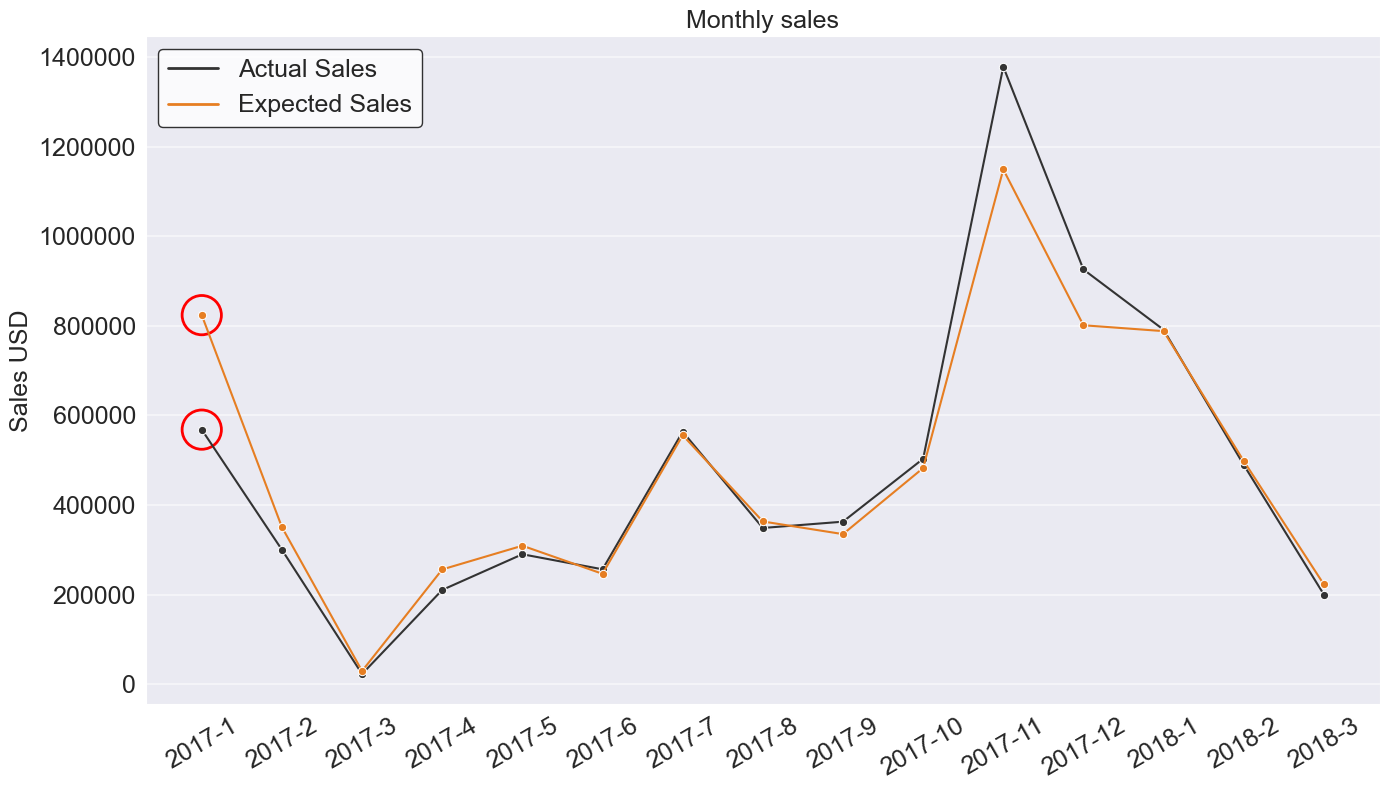

In [ ]:
# sales_color =  '#F9DC5C'
sales_color =  '#333333'
# predicted_color = '#F9DC5C'
predicted_color = '#E67E22'

sns.lineplot(x="date", y="sales", data=monthly_sales_df, marker="o", color=sales_color)
sns.lineplot(x="date", y="predicted_sales", data=monthly_sales_df, marker="o", color=predicted_color)

highlight = monthly_sales_df[monthly_sales_df['date'] == '2017-1']
plt.scatter(highlight['date'], highlight['sales'], s=800, facecolors='none', edgecolors='r', linewidths=2)
plt.scatter(highlight['date'], highlight['predicted_sales'], s=800, facecolors='none', edgecolors='r', linewidths=2)

# highlight = monthly_sales_df[monthly_sales_df['date'] == '2017-12']
# plt.scatter(highlight['date'], highlight['sales'], s=800, facecolors='none', edgecolors='r', linewidths=2)
# plt.scatter(highlight['date'], highlight['predicted_sales'], s=800, facecolors='none', edgecolors='r', linewidths=2)

ax = plt.gca()
# Custom function for float formatting
float_formatter = FuncFormatter(lambda x, _: f'{x:.0f}')
# Force float notation
ax.xaxis.set_major_formatter(float_formatter)
ax.yaxis.set_major_formatter(float_formatter)

size_font = 18
ax.set_title('Monthly sales', fontsize=size_font);
ax.set_xticklabels(monthly_sales_df['date'], rotation=30);
ax.grid(axis="y", linestyle="--", alpha=0.5, linewidth=1.5);
ax.grid(axis="x", linestyle="--", alpha=0.0, linewidth=1.5);
ax.set_xlabel('');
ax.set_ylabel('Sales USD', fontsize=size_font);
ax.tick_params(axis='both', which='major', labelsize=size_font);

# Add the legend
legend_handles = [
    Line2D([0], [0], color=sales_color, lw=2, label='Actual Sales'),
    Line2D([0], [0], color=predicted_color, lw=2, label='Expected Sales')
]

ax.legend(
    handles=legend_handles,
    fontsize=size_font,
    loc='upper left',
    frameon=True,
    facecolor='white',
    edgecolor='black'
)


sns.set_style("dark")
plt.gcf().set_size_inches(14, 8)
plt.tight_layout()

plt.savefig('./plots/Monthly_sales' + '.png')
plt.show()

